<a href="https://colab.research.google.com/github/Nagesh-Cheripally/Energy-Consumption-Prediction/blob/main/Energy_Consumption_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Taken From https://archive.ics.uci.edu/ml/index.php



---


## Content

The data set is at 10 min interval for about 4.5 months. The house temperature and humidity conditions were monitored with a ZigBee wireless sensor network. 


*Highlights:*





The appliances energy consumption prediction in a low energy house is the dataset content
Weather data from a nearby station was found to improve the prediction.



*  Pressure, air temperature and wind speed are important parameters in the prediction
*   Data from a WSN that measures temperature and humidity increase the pred. accuracy.
* From the WSN, the kitchen, laundry and living room data ranked high in importance.





In [ ]:
# Upload csv file for data analysis
from google.colab import files
upload = files.upload()

Saving energydata_complete.csv to energydata_complete.csv


In [ ]:
#import all the libraries
import numpy as np     # linear algebra 
import pandas as pd    # Data Preprocessing 
import matplotlib.pyplot as plt  # Data Visualization & Plotting
import statsmodels.api as sm # Model implementation, Metrics
import seaborn as sn # Data Visualization & Plotting
import io 
import os
from sklearn import preprocessing, model_selection, metrics
import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df = pd.read_csv(io.BytesIO(upload['energydata_complete.csv']))


In [ ]:
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [ ]:
df.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,19.592106,50.949283,7.910939,54.609083,20.267106,35.388200,22.029107,42.936165,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,1.844623,9.022034,6.090347,31.149806,2.109993,5.114208,1.956162,5.224361,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,15.330000,29.815000,-6.065000,1.000000,15.390000,23.200000,16.306667,29.600000,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,18.277500,45.400000,3.626667,30.025000,18.700000,31.500000,20.790000,39.066667,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,19.390000,49.090000,7.300000,55.290000,20.033333,34.863333,22.100000,42.375000,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,20.619643,53.663333,11.256000,83.226667,21.600000,39.000000,23.390000,46.536000,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,25.795000,96.321667,28.290000,99.900000,26.000000,51.400000,27.230000,58.780000,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


In [ ]:
# The number of rows & columns in dataset
# Check for Null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

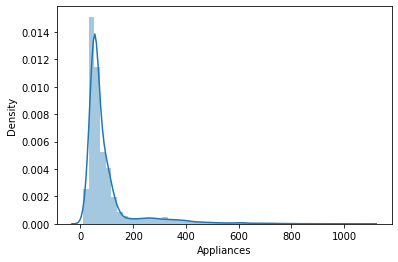

In [ ]:
sn.distplot(df['Appliances'])

Text(0.5, 1.0, 'Correlation Heatmap')

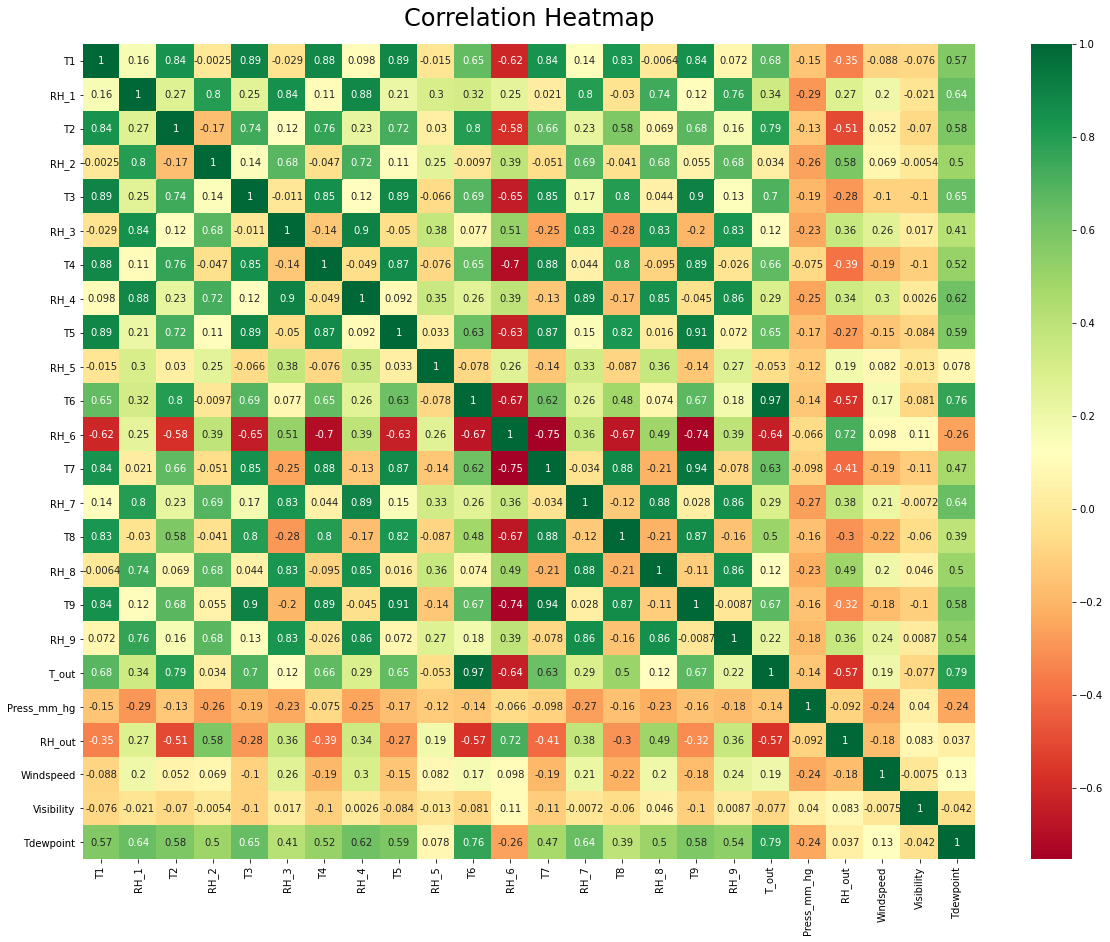

In [ ]:
import os
figure_size = (15, 12)
features_df = df.drop(['rv1', 'rv2','lights', 'Appliances'], axis = 1)
fig, ax = plt.subplots(figsize= [20,15])
heatmap = sn.heatmap(features_df.corr(), annot = True, cmap= 'RdYlGn')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':24}, pad=18)

In [ ]:
from sklearn.model_selection import train_test_split

# 80% for training of the models and the rest is used for testing
train, test = train_test_split(df,test_size=0.20,random_state=40)

In [ ]:
# Divide the columns based on type for clear column management 

col_temp = ["T1","T2","T3","T4","T5","T6","T7","T8","T9"]
col_hum = ["RH_1","RH_2","RH_3","RH_4","RH_5","RH_6","RH_7","RH_8","RH_9"]
col_weather = ["T_out", "Tdewpoint","RH_out","Press_mm_hg", "Windspeed","Visibility"] 
col_light = ["lights"]
col_randoms = ["rv1", "rv2"]
col_target = ["Appliances"]

In [ ]:
feature_vars = train[col_temp + col_hum + col_weather + col_light + col_randoms ]
target_vars = train[col_target]
feature_vars.describe()

,T1,T2,T3,T4,T5,T6,T7,T8,T9,RH_1,RH_2,RH_3,RH_4,RH_5,RH_6,RH_7,RH_8,RH_9,T_out,Tdewpoint,RH_out,Press_mm_hg,Windspeed,Visibility,lights,rv1,rv2
count,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000,15788.000000
mean,21.678518,20.334025,22.260086,20.850323,19.583439,7.906445,20.258524,22.023867,19.478627,40.262143,40.426742,39.250773,39.032470,50.920308,54.667153,35.395282,42.945911,41.561343,7.407244,3.760375,79.775016,755.550528,4.051378,38.391414,3.827591,25.024810,25.024810
std,1.606283,2.193174,1.999775,2.040500,1.842384,6.072646,2.104972,1.952412,2.009700,3.981984,4.076340,3.258047,4.351714,8.956799,31.128068,5.126754,5.238856,4.163317,5.299596,4.187537,14.928167,7.394142,2.453948,11.807620,7.954862,14.530871,14.530871
min,16.790000,16.100000,17.200000,15.100000,15.330000,-6.065000,15.390000,16.306667,14.890000,27.233333,20.463333,28.766667,27.660000,29.815000,1.000000,23.200000,29.600000,29.166667,-5.000000,-6.600000,24.000000,729.333333,0.000000,1.000000,0.000000,0.006033,0.006033
25%,20.730000,18.790000,20.790000,19.500000,18.288750,3.656667,18.700000,20.790000,18.000000,37.360000,37.900000,36.900000,35.525625,45.400000,30.073667,31.500000,39.090000,38.500000,3.700000,0.916667,70.333333,750.983333,2.000000,29.000000,0.000000,12.552884,12.552884
50%,21.600000,20.000000,22.100000,20.658333,19.390000,7.300000,20.012698,22.100000,19.390000,39.626667,40.500000,38.560000,38.400000,49.090000,55.300000,34.882976,42.400000,40.900000,6.916667,3.450000,83.833333,756.100000,3.666667,40.000000,0.000000,24.928013,24.928013
75%,22.600000,21.500000,23.290000,22.100000,20.615000,11.260000,21.600000,23.390000,20.600000,43.090000,43.290000,41.790000,42.163333,53.656167,83.226806,39.000000,46.558750,44.363333,10.400000,6.566667,91.666667,760.966667,5.500000,40.000000,0.000000,37.752973,37.752973
max,26.260000,29.856667,29.200000,26.200000,25.795000,28.290000,25.963333,27.230000,24.500000,63.360000,56.026667,50.163333,51.090000,96.321667,99.900000,51.400000,58.780000,53.326667,26.100000,15.500000,100.000000,772.300000,14.000000,66.000000,60.000000,49.993173,49.993173


In [ ]:
feature_vars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15788 entries, 14323 to 11590
Data columns (total 27 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   T1           15788 non-null  float64
 1   T2           15788 non-null  float64
 2   T3           15788 non-null  float64
 3   T4           15788 non-null  float64
 4   T5           15788 non-null  float64
 5   T6           15788 non-null  float64
 6   T7           15788 non-null  float64
 7   T8           15788 non-null  float64
 8   T9           15788 non-null  float64
 9   RH_1         15788 non-null  float64
 10  RH_2         15788 non-null  float64
 11  RH_3         15788 non-null  float64
 12  RH_4         15788 non-null  float64
 13  RH_5         15788 non-null  float64
 14  RH_6         15788 non-null  float64
 15  RH_7         15788 non-null  float64
 16  RH_8         15788 non-null  float64
 17  RH_9         15788 non-null  float64
 18  T_out        15788 non-null  float64
 19  

In [ ]:
feature_vars.head()

,T1,T2,T3,T4,T5,T6,T7,T8,T9,RH_1,RH_2,RH_3,RH_4,RH_5,RH_6,RH_7,RH_8,RH_9,T_out,Tdewpoint,RH_out,Press_mm_hg,Windspeed,Visibility,lights,rv1,rv2
14323,21.20,18.200000,22.390000,21.39,19.963333,2.126667,20.361429,21.79,20.0,38.000000,41.29,37.90,35.20,48.163333,47.196667,31.332857,42.790000,41.09,3.566667,1.750000,88.000000,767.300000,3.000000,28.833333,0,10.870123,10.870123
8578,20.29,16.700000,20.566667,19.79,17.790000,0.000000,19.390000,20.89,18.1,36.200000,41.79,37.40,34.09,49.790000,70.863333,35.626667,43.000000,41.06,-0.866667,-1.833333,93.333333,764.000000,1.000000,23.333333,0,9.366347,9.366347
2277,19.76,18.926667,19.890000,18.60,17.500000,11.066667,17.812222,17.70,17.1,46.000000,45.59,45.20,47.20,55.114444,87.933333,45.044444,50.555000,48.90,11.000000,8.300000,83.500000,756.800000,10.500000,34.500000,0,26.754859,26.754859
7255,20.70,19.100000,20.600000,19.20,18.963333,8.100000,18.500000,20.60,18.0,40.090000,41.59,38.59,39.29,45.900000,84.693333,35.500000,49.400000,41.59,8.100000,6.133333,87.833333,748.900000,7.666667,43.166667,0,37.247027,37.247027
12593,21.26,18.500000,22.390000,20.60,19.890000,5.063333,21.200000,21.50,20.6,39.466667,43.53,38.40,38.50,48.000000,57.000000,37.590000,40.826667,43.00,5.566667,4.933333,95.833333,753.916667,2.166667,21.166667,0,48.214304,48.214304


In [ ]:
feature_vars.lights.value_counts()

0     12182
10     1772
20     1313
30      446
40       69
50        5
60        1
Name: lights, dtype: int64

In [ ]:
target_vars.describe()

,Appliances
count,15788.000000
mean,97.523436
std,102.668076
min,10.000000
25%,50.000000
50%,60.000000
75%,100.000000
max,1080.000000


In [ ]:
# Due to lot of zero enteries this column is of not much use and will be ignored in rest of the model
_ = feature_vars.drop(['lights'], axis=1 , inplace= True)

In [ ]:
feature_vars.head(2)

,T1,T2,T3,T4,T5,T6,T7,T8,T9,RH_1,RH_2,RH_3,RH_4,RH_5,RH_6,RH_7,RH_8,RH_9,T_out,Tdewpoint,RH_out,Press_mm_hg,Windspeed,Visibility,rv1,rv2
14323,21.20,18.2,22.390000,21.39,19.963333,2.126667,20.361429,21.79,20.0,38.0,41.29,37.9,35.20,48.163333,47.196667,31.332857,42.79,41.09,3.566667,1.750000,88.000000,767.3,3.0,28.833333,10.870123,10.870123
8578,20.29,16.7,20.566667,19.79,17.790000,0.000000,19.390000,20.89,18.1,36.2,41.79,37.4,34.09,49.790000,70.863333,35.626667,43.00,41.06,-0.866667,-1.833333,93.333333,764.0,1.0,23.333333,9.366347,9.366347


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb49e637a90>,
      dtype=object)

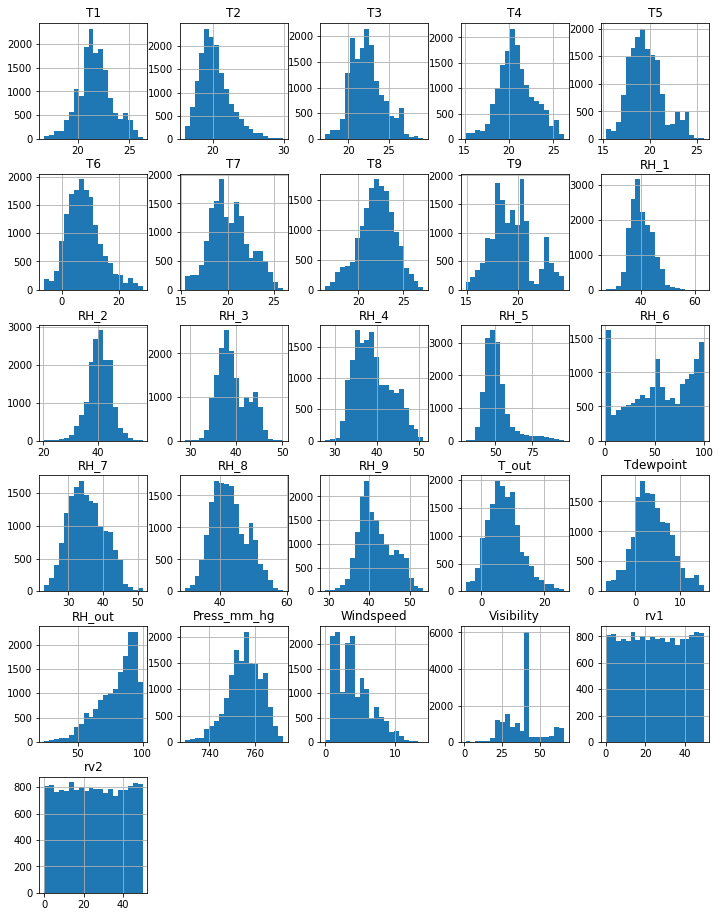

In [ ]:
# Histogram of all the features to understand the distribution
feature_vars.hist(bins = 20 , figsize= (12,16))

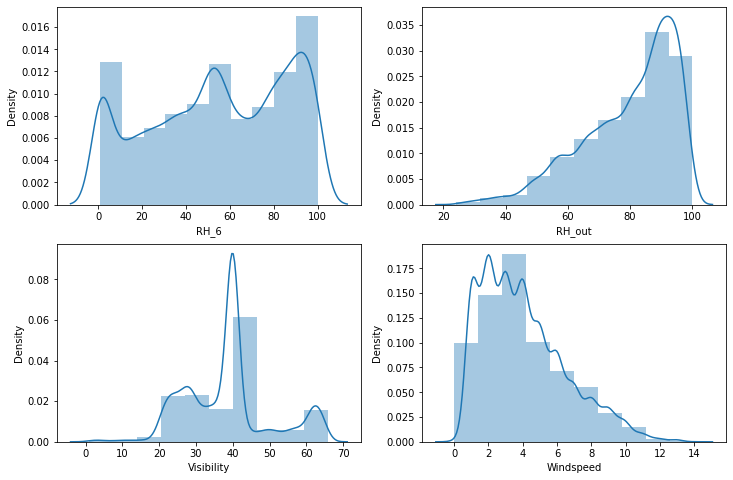

In [ ]:
# focussed displots for RH_6 , RH_out , Visibility , Windspeed due to irregular distribution
f, ax = plt.subplots(2,2,figsize=(12,8))
vis1 = sn.distplot(feature_vars["RH_6"],bins=10, ax= ax[0][0])
vis2 = sn.distplot(feature_vars["RH_out"],bins=10, ax=ax[0][1])
vis3 = sn.distplot(feature_vars["Visibility"],bins=10, ax=ax[1][0])
vis4 = sn.distplot(feature_vars["Windspeed"],bins=10, ax=ax[1][1])

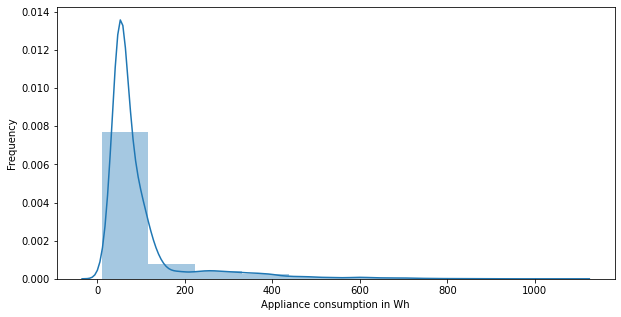

In [ ]:
# Distribution of values in Applainces column
f = plt.figure(figsize=(10,5))
plt.xlabel('Appliance consumption in Wh')
plt.ylabel('Frequency')
sn.distplot(target_vars , bins=10 ) ;

In [ ]:
#Appliance column range with consumption less than 200 Wh
print('Percentage of the appliance consumption is less than 200 Wh')
print(((target_vars[target_vars <= 200].count()) / (len(target_vars)))*100 )

Percentage of the appliance consumption is less than 200 Wh
Appliances    90.315429
dtype: float64


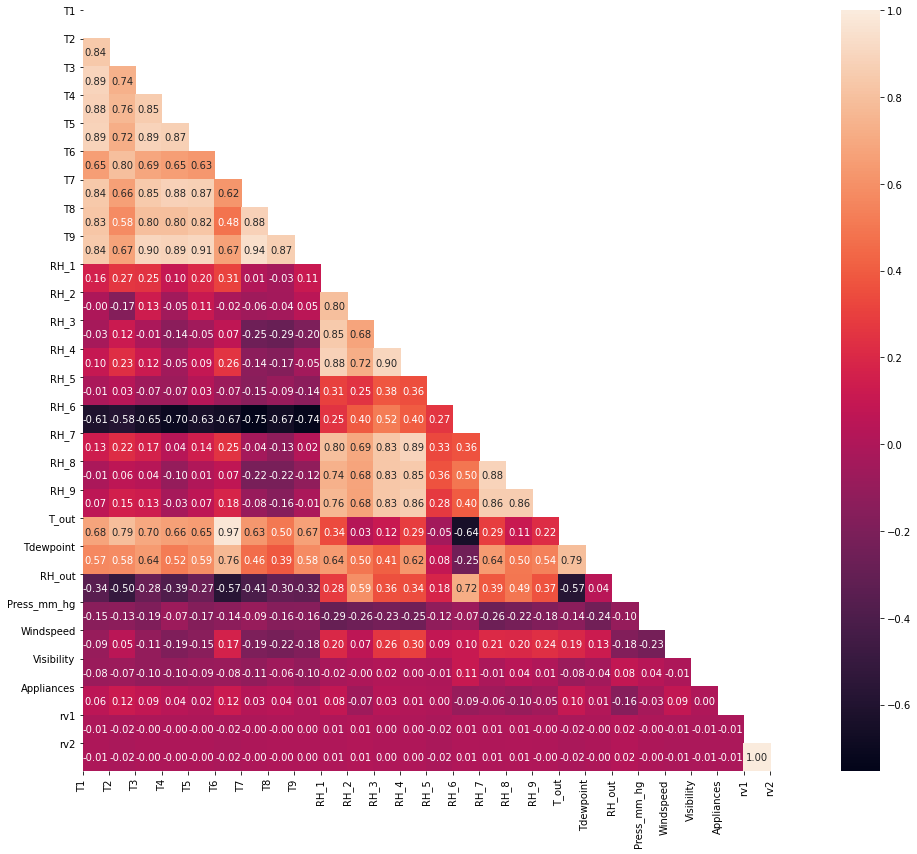

In [ ]:
# Use the weather , temperature , applainces and random column to see the correlation
train_corr = train[col_temp + col_hum + col_weather +col_target+col_randoms]
corr = train_corr.corr()
# Mask the repeated values
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
  
f, ax = plt.subplots(figsize=(16, 14))
#Generate Heat Map, allow annotations and place floats in map
sn.heatmap(corr, annot=True, fmt=".2f" , mask=mask,)
    #Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
    #Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
    #show plot
plt.show()

In [ ]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

# Function to get top correlations 

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(train_corr, 40))

Top Absolute Correlations
rv1   rv2      1.000000
T6    T_out    0.974542
T7    T9       0.944040
T5    T9       0.910518
T3    T9       0.900996
RH_3  RH_4     0.899459
RH_4  RH_7     0.894588
T1    T3       0.892857
T4    T9       0.888917
T3    T5       0.888649
T1    T5       0.885385
RH_7  RH_8     0.884228
T7    T8       0.881532
RH_1  RH_4     0.880205
T4    T7       0.877290
T1    T4       0.876996
T4    T5       0.872149
T5    T7       0.869847
T8    T9       0.868543
RH_7  RH_9     0.859545
RH_4  RH_9     0.857135
RH_8  RH_9     0.856992
T3    T4       0.852899
RH_4  RH_8     0.848080
T3    T7       0.846884
RH_1  RH_3     0.845058
T1    T9       0.843789
      T7       0.837853
      T2       0.836188
RH_3  RH_9     0.833754
      RH_7     0.833506
      RH_8     0.829869
T1    T8       0.825500
T5    T8       0.824341
T2    T6       0.800786
RH_1  RH_7     0.800779
      RH_2     0.798200
T4    T8       0.796485
T3    T8       0.795074
T2    T_out    0.791347
dtype: float64

Observations based on correlation plot

    Temperature - All the temperature variables from T1-T9 and T_out have positive correlation with the target Appliances .
    
    For the indoortemperatures, the correlations are high as expected, since the ventilation is driven by the HRV unit and minimizes air tempera-ture differences between rooms. Four columns have a high degree of correlation with T9 - T3,T5,T7,T8 also T6 & T_Out has high correlation (both temperatures from outside) . Hence T6 & T9 can be removed from training set as information provided by them can be provided by other fields.

    Weather attributes - Visibility, Tdewpoint, Press_mm_hg have low correlation values

    Humidity - There are no significantly high correlation cases (> 0.9) for humidity sensors.

    Random variables have no role to play


In [ ]:
# Data Preprocessing
#Split training dataset into independent and dependent varibales
train_X = train[feature_vars.columns]
train_y = train[target_vars.columns]


#Split testing dataset into independent and dependent varibales
test_X = test[feature_vars.columns]
test_y = test[target_vars.columns]

# Due to conlusion made above below columns are removed
train_X.drop(["rv1","rv2","Visibility","T6","T9"],axis=1 , inplace=True)

# Due to conlusion made above below columns are removed
test_X.drop(["rv1","rv2","Visibility","T6","T9"], axis=1, inplace=True)

train_X.columns


Index(['T1', 'T2', 'T3', 'T4', 'T5', 'T7', 'T8', 'RH_1', 'RH_2', 'RH_3',
       'RH_4', 'RH_5', 'RH_6', 'RH_7', 'RH_8', 'RH_9', 'T_out', 'Tdewpoint',
       'RH_out', 'Press_mm_hg', 'Windspeed'],
      dtype='object')

In [ ]:
test_X.columns

Index(['T1', 'T2', 'T3', 'T4', 'T5', 'T7', 'T8', 'RH_1', 'RH_2', 'RH_3',
       'RH_4', 'RH_5', 'RH_6', 'RH_7', 'RH_8', 'RH_9', 'T_out', 'Tdewpoint',
       'RH_out', 'Press_mm_hg', 'Windspeed'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

# Create test and training set by including Appliances column

train = train[list(train_X.columns.values) + col_target ]

test = test[list(test_X.columns.values) + col_target ]

# Create dummy test and training set to hold scaled values

sc_train = pd.DataFrame(columns=train.columns , index=train.index)

sc_train[sc_train.columns] = sc.fit_transform(train)

sc_test= pd.DataFrame(columns=test.columns , index=test.index)

sc_test[sc_test.columns] = sc.fit_transform(test)

In [ ]:
sc_train.head()

,T1,T2,T3,T4,T5,T7,T8,RH_1,RH_2,RH_3,RH_4,RH_5,RH_6,RH_7,RH_8,RH_9,T_out,Tdewpoint,RH_out,Press_mm_hg,Windspeed,Appliances
14323,-0.297913,-0.973062,0.064966,0.264491,0.206204,0.048888,-0.119787,-0.568112,0.211780,-0.414609,-0.880709,-0.307818,-0.240000,-0.792422,-0.029761,-0.113217,-0.724715,-0.480101,0.550988,1.589075,-0.428457,-0.560303
8578,-0.864457,-1.657024,-0.846832,-0.519655,-0.973465,-0.412619,-0.580770,-1.020163,0.334442,-0.568080,-1.135789,-0.126200,0.520324,0.045134,0.010325,-0.120423,-1.561284,-1.335841,0.908266,1.142761,-1.243496,-0.657708
2277,-1.194421,-0.641720,-1.185214,-1.102864,-1.130874,-1.162191,-2.214698,1.441000,1.266681,1.826068,1.876913,0.468278,1.068721,1.882179,1.452479,1.762751,0.677952,1.084114,0.249535,0.168987,2.627939,-0.657708
7255,-0.609201,-0.562684,-0.830163,-0.808809,-0.336589,-0.835441,-0.729309,-0.043232,0.285377,-0.202819,0.059181,-0.560520,0.964632,0.020426,1.232004,0.006883,0.130723,0.566690,0.539823,-0.899461,1.473301,-0.462899
12593,-0.260559,-0.836269,0.064966,-0.122681,0.166399,0.447277,-0.268326,-0.199775,0.761309,-0.261138,-0.122363,-0.326054,0.074946,0.428105,-0.404537,0.345566,-0.347316,0.280116,1.075740,-0.220974,-0.768057,-0.462899


In [ ]:
sc_test.head()

,T1,T2,T3,T4,T5,T7,T8,RH_1,RH_2,RH_3,RH_4,RH_5,RH_6,RH_7,RH_8,RH_9,T_out,Tdewpoint,RH_out,Press_mm_hg,Windspeed,Appliances
6314,-0.697152,-0.351285,-0.771901,-0.285236,-0.823883,-0.420603,-0.955581,-0.358687,-0.428293,0.305695,-0.405784,-0.151102,1.090314,-0.408773,-0.729901,-0.439550,-0.240536,-1.159224,-1.306034,0.375913,-0.816995,-0.376479
12257,0.798369,0.270691,1.412601,0.304355,1.046810,0.797592,1.040075,0.665203,1.079477,-0.218923,0.531551,2.385509,-1.043741,-0.278432,-0.988654,-0.557214,0.851391,0.478644,-0.956743,-0.401313,0.002768,3.056667
6271,-0.869553,-1.066026,-0.540485,-0.528869,-0.667392,-0.611113,-0.938668,-0.189018,0.157009,0.426049,-0.187150,0.772281,0.874534,0.699130,0.542572,0.702629,-1.610857,-1.277624,1.195339,0.614023,-0.885309,-0.670749
18179,0.922996,0.465344,0.936639,1.132706,1.118760,1.487187,1.390160,-0.425882,-0.512849,-0.881530,-0.692644,-1.035323,-1.351756,-0.348399,-0.676989,-1.045625,0.579182,0.561524,-0.314499,0.699383,-1.226877,-0.572659
9661,-0.011705,-0.381700,-0.410826,-0.150426,-0.608034,-0.282415,0.329757,-0.803856,-0.322773,-1.032597,-1.187283,-0.568601,0.047591,-1.025592,-1.027371,-1.200538,-0.314775,-0.006796,0.530560,0.915030,0.002768,0.212060


In [ ]:


# Remove Appliances column from traininig set

train_X =  sc_train.drop(['Appliances'] , axis=1)
train_y = sc_train['Appliances']

test_X =  sc_test.drop(['Appliances'] , axis=1)
test_y = sc_test['Appliances']



In [ ]:
train_X.head()

,T1,T2,T3,T4,T5,T7,T8,RH_1,RH_2,RH_3,RH_4,RH_5,RH_6,RH_7,RH_8,RH_9,T_out,Tdewpoint,RH_out,Press_mm_hg,Windspeed
14323,-0.297913,-0.973062,0.064966,0.264491,0.206204,0.048888,-0.119787,-0.568112,0.211780,-0.414609,-0.880709,-0.307818,-0.240000,-0.792422,-0.029761,-0.113217,-0.724715,-0.480101,0.550988,1.589075,-0.428457
8578,-0.864457,-1.657024,-0.846832,-0.519655,-0.973465,-0.412619,-0.580770,-1.020163,0.334442,-0.568080,-1.135789,-0.126200,0.520324,0.045134,0.010325,-0.120423,-1.561284,-1.335841,0.908266,1.142761,-1.243496
2277,-1.194421,-0.641720,-1.185214,-1.102864,-1.130874,-1.162191,-2.214698,1.441000,1.266681,1.826068,1.876913,0.468278,1.068721,1.882179,1.452479,1.762751,0.677952,1.084114,0.249535,0.168987,2.627939
7255,-0.609201,-0.562684,-0.830163,-0.808809,-0.336589,-0.835441,-0.729309,-0.043232,0.285377,-0.202819,0.059181,-0.560520,0.964632,0.020426,1.232004,0.006883,0.130723,0.566690,0.539823,-0.899461,1.473301
12593,-0.260559,-0.836269,0.064966,-0.122681,0.166399,0.447277,-0.268326,-0.199775,0.761309,-0.261138,-0.122363,-0.326054,0.074946,0.428105,-0.404537,0.345566,-0.347316,0.280116,1.075740,-0.220974,-0.768057


In [ ]:
test_X.head()

,T1,T2,T3,T4,T5,T7,T8,RH_1,RH_2,RH_3,RH_4,RH_5,RH_6,RH_7,RH_8,RH_9,T_out,Tdewpoint,RH_out,Press_mm_hg,Windspeed
6314,-0.697152,-0.351285,-0.771901,-0.285236,-0.823883,-0.420603,-0.955581,-0.358687,-0.428293,0.305695,-0.405784,-0.151102,1.090314,-0.408773,-0.729901,-0.439550,-0.240536,-1.159224,-1.306034,0.375913,-0.816995
12257,0.798369,0.270691,1.412601,0.304355,1.046810,0.797592,1.040075,0.665203,1.079477,-0.218923,0.531551,2.385509,-1.043741,-0.278432,-0.988654,-0.557214,0.851391,0.478644,-0.956743,-0.401313,0.002768
6271,-0.869553,-1.066026,-0.540485,-0.528869,-0.667392,-0.611113,-0.938668,-0.189018,0.157009,0.426049,-0.187150,0.772281,0.874534,0.699130,0.542572,0.702629,-1.610857,-1.277624,1.195339,0.614023,-0.885309
18179,0.922996,0.465344,0.936639,1.132706,1.118760,1.487187,1.390160,-0.425882,-0.512849,-0.881530,-0.692644,-1.035323,-1.351756,-0.348399,-0.676989,-1.045625,0.579182,0.561524,-0.314499,0.699383,-1.226877
9661,-0.011705,-0.381700,-0.410826,-0.150426,-0.608034,-0.282415,0.329757,-0.803856,-0.322773,-1.032597,-1.187283,-0.568601,0.047591,-1.025592,-1.027371,-1.200538,-0.314775,-0.006796,0.530560,0.915030,0.002768



Model Implementation¶

We will be looking at following Algorithms

Improved Linear regression models

1.Ridge regression

2.Lasso regression

Support Vector Machine

3.Support vector regression

Nearest neighbour Regressor

4.KNeighborsRegressor

Ensmble models

5.Random Forest Regressor

6.Gradient Boosting Regressor

7.ExtraTrees Regressor

Neural Network

8.Multi Layer Preceptron Regressor


In [ ]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.neural_network import MLPRegressor
import xgboost as xgb
from sklearn import neighbors
from sklearn.svm import SVR

In [ ]:
models = [
           ['Lasso: ', Lasso()],
           ['Ridge: ', Ridge()],
           ['KNeighborsRegressor: ',  neighbors.KNeighborsRegressor()],
           ['SVR:' , SVR(kernel='rbf')],
           ['RandomForest ',RandomForestRegressor()],
           ['ExtraTreeRegressor :',ExtraTreesRegressor()],
           ['GradientBoostingClassifier: ', GradientBoostingRegressor()] ,
           ['XGBRegressor: ', xgb.XGBRegressor()] ,
           ['MLPRegressor: ', MLPRegressor(  activation='relu', solver='adam',learning_rate='adaptive',max_iter=1000,learning_rate_init=0.01,alpha=0.01)]
         ]

In [ ]:
# Run all the proposed models and update the information in a list model_data
import time
from math import sqrt
from sklearn.metrics import mean_squared_error

model_data = []
for name,curr_model in models :
    curr_model_data = {}
    curr_model.random_state = 78
    curr_model_data["Name"] = name
    start = time.time()
    curr_model.fit(train_X,train_y)
    end = time.time()
    curr_model_data["Train_Time"] = end - start
    curr_model_data["Train_R2_Score"] = metrics.r2_score(train_y,curr_model.predict(train_X))
    curr_model_data["Test_R2_Score"] = metrics.r2_score(test_y,curr_model.predict(test_X))
    curr_model_data["Test_RMSE_Score"] = sqrt(mean_squared_error(test_y,curr_model.predict(test_X)))
    model_data.append(curr_model_data)

[14:20:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
model_data

[{'Name': 'Lasso: ',
  'Test_R2_Score': 0.0,
  'Test_RMSE_Score': 1.0,
  'Train_R2_Score': 0.0,
  'Train_Time': 0.007758140563964844},
 {'Name': 'Ridge: ',
  'Test_R2_Score': 0.1249719530056127,
  'Test_RMSE_Score': 0.9354293383224557,
  'Train_R2_Score': 0.13588469001664938,
  'Train_Time': 0.0200655460357666},
 {'Name': 'KNeighborsRegressor: ',
  'Test_R2_Score': 0.49216166765119307,
  'Test_RMSE_Score': 0.7126277656314037,
  'Train_R2_Score': 0.6927946226654706,
  'Train_Time': 0.10634422302246094},
 {'Name': 'SVR:',
  'Test_R2_Score': 0.21342236212096655,
  'Test_RMSE_Score': 0.8868921230223175,
  'Train_R2_Score': 0.23751493633419796,
  'Train_Time': 16.247859239578247},
 {'Name': 'RandomForest ',
  'Test_R2_Score': 0.5698114461582144,
  'Test_RMSE_Score': 0.6558876076293755,
  'Train_R2_Score': 0.9400710838519922,
  'Train_Time': 33.49922013282776},
 {'Name': 'ExtraTreeRegressor :',
  'Test_R2_Score': 0.6316245402471545,
  'Test_RMSE_Score': 0.6069394201671576,
  'Train_R2_Score'

In [ ]:
# Convert list to dataframe
df = pd.DataFrame(model_data)
df


,Name,Train_Time,Train_R2_Score,Test_R2_Score,Test_RMSE_Score
0,Lasso:,0.007758,0.000000,0.000000,1.000000
1,Ridge:,0.020066,0.135885,0.124972,0.935429
2,KNeighborsRegressor:,0.106344,0.692795,0.492162,0.712628
3,SVR:,16.247859,0.237515,0.213422,0.886892
4,RandomForest,33.499220,0.940071,0.569811,0.655888
5,ExtraTreeRegressor :,7.990363,1.000000,0.631625,0.606939
6,GradientBoostingClassifier:,7.749050,0.318989,0.233229,0.875654
7,XGBRegressor:,1.630629,0.319027,0.239070,0.872313
8,MLPRegressor:,10.519551,0.438241,0.339719,0.812577


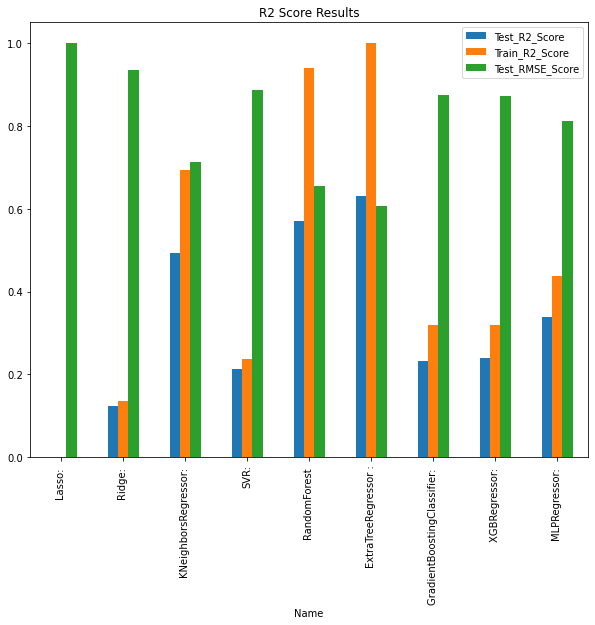

In [ ]:
df.plot(x="Name", y=['Test_R2_Score' , 'Train_R2_Score' , 'Test_RMSE_Score'], kind="bar" , title = 'R2 Score Results' , figsize= (10,8))

In [ ]:
# Parameter tuning
from sklearn.model_selection import GridSearchCV
param_grid = [{
              'max_depth': [80, 150, 200,250],
              'n_estimators' : [100,150,200,250],
              'max_features': ["auto", "sqrt", "log2"]
            }]
reg = ExtraTreesRegressor(random_state=40)
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = reg, param_grid = param_grid, cv = 5, n_jobs = -1 , scoring='r2' , verbose=2)
grid_search.fit(train_X, train_y)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed: 13.5min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed: 19.4min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0,
                                           criterion='mse', max_depth=None,
                                           max_features='auto',
                                           max_leaf_nodes=None,
                                           max_samples=None,
                                           min_impurity_decrease=0.0,
                                           min_impurity_split=None,
                                           min_samples_leaf=1,
                                           min_samples_split=2,
                                           min_weight_fraction_leaf=0.0,
                                           n_estimators=100, n_jobs=None,
                                           oob_score=False, random_state=40,
                                           verbose=0, warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_g

In [ ]:
# Tuned parameter set
grid_search.best_params_

{'max_depth': 80, 'max_features': 'sqrt', 'n_estimators': 250}

In [ ]:
# Best possible parameters for ExtraTreesRegressor
grid_search.best_estimator_

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=80, max_features='sqrt', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=250, n_jobs=None, oob_score=False,
                    random_state=40, verbose=0, warm_start=False)

In [ ]:
# R2 score on training set with tuned parameters

grid_search.best_estimator_.score(train_X,train_y)

1.0

In [ ]:
# R2 score on test set with tuned parameters
grid_search.best_estimator_.score(test_X,test_y)

0.6295991266485877

In [ ]:
# RMSE score on test set with tuned parameters

np.sqrt(mean_squared_error(test_y, grid_search.best_estimator_.predict(test_X)))

0.6086056796903988

In [ ]:
# Get sorted list of features in order of importance
feature_indices = np.argsort(grid_search.best_estimator_.feature_importances_)

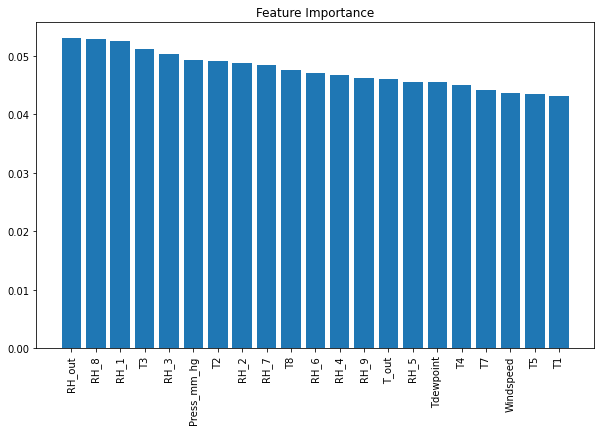

In [ ]:
importances = grid_search.best_estimator_.feature_importances_
indices = np.argsort(importances)[::-1]
names = [train_X.columns[i] for i in indices]
# Create plot
plt.figure(figsize=(10,6))

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(train_X.shape[1]), importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(train_X.shape[1]), names, rotation=90)

# Show plot
plt.show()

In [ ]:
# Get top 5 most important feature 
names[0:5]

['RH_out', 'RH_8', 'RH_1', 'T3', 'RH_3']

In [ ]:
# Get 5 least important feature 
names[-5:]

['T4', 'T7', 'Windspeed', 'T5', 'T1']

In [ ]:
# Reduce test & training set to 5 feature set
train_important_feature = train_X[names[0:5]]
test_important_feature = test_X[names[0:5]]

In [ ]:
# Clone the Gridsearch model with his parameter and fit on reduced dataset

from sklearn.base import clone
cloned_model = clone(grid_search.best_estimator_)
cloned_model.fit(train_important_feature , train_y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=80, max_features='sqrt', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=250, n_jobs=None, oob_score=False,
                    random_state=40, verbose=0, warm_start=False)

In [ ]:
# Clone the Gridsearch model with his parameter and fit on reduced dataset

from sklearn.base import clone
cloned_model = clone(grid_search.best_estimator_)
cloned_model.fit(train_important_feature , train_y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=80, max_features='sqrt', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=250, n_jobs=None, oob_score=False,
                    random_state=40, verbose=0, warm_start=False)

In [ ]:
# Reduced dataset scores 

print('Training set R2 Score - ', metrics.r2_score(train_y,cloned_model.predict(train_important_feature)))
print('Testing set R2 Score - ', metrics.r2_score(test_y,cloned_model.predict(test_important_feature)))
print('Testing set RMSE Score - ', np.sqrt(mean_squared_error(test_y, cloned_model.predict(test_important_feature))))

Training set R2 Score -  0.9999836745224266
Testing set R2 Score -  0.4687470481220707
Testing set RMSE Score -  0.7288710118244032



Conclusion

    The best Algorithm to use for this dataset Extra Trees Regressor

    The untuned model was able to explain 57% of variance on test set .

    The tuned model was able to explain 63% of varaince on tese set which is improvement of 10%

    The final model had 22 features

    Feature reduction was not able to add to better R2 score

